Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer

warnings.filterwarnings("ignore")
%matplotlib inline


* CUSTID - Identification of Credit Card holder (Categorical)
* BALANCE - Balance amount left in their account to make purchases
* BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES - Amount of purchases made from account
* ONEOFFPURCHASES - Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES - Amount of purchase done in installment
* CASHADVANCE - Cash in advance given by the user
* PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
* CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
* PURCHASESTRX - Number of purchase transactions made
* CREDITLIMIT - Limit of Credit Card for user
* PAYMENTS - Amount of Payment done by user
* MINIMUM_PAYMENTS - Minimum amount of payments made by user
* PRCFULLPAYMENT - Percent of full payment paid by user
* TENURE - Tenure of credit card service for user


Loading dataset

In [2]:
df = pd.read_csv('Hacktiv8-project/csv/CC GENERAL.xls')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.duplicated().value_counts()
# false berarti tidak duplikat

False    8950
dtype: int64

Data cleaning & EDA

In [7]:
# pengisian missing value menggunakan mean
ms_col = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
for col in ms_col:
    df.loc[df[col].isna() ==True, col] = df[col].mean()
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
# drop cust_id  karna tidak berpengaruh pada proses clustering
df.drop(
    'CUST_ID', axis=1, inplace=True
)

In [9]:
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         206
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

<small> plotting variabel frekuensi menjadi chart histogram
</small>

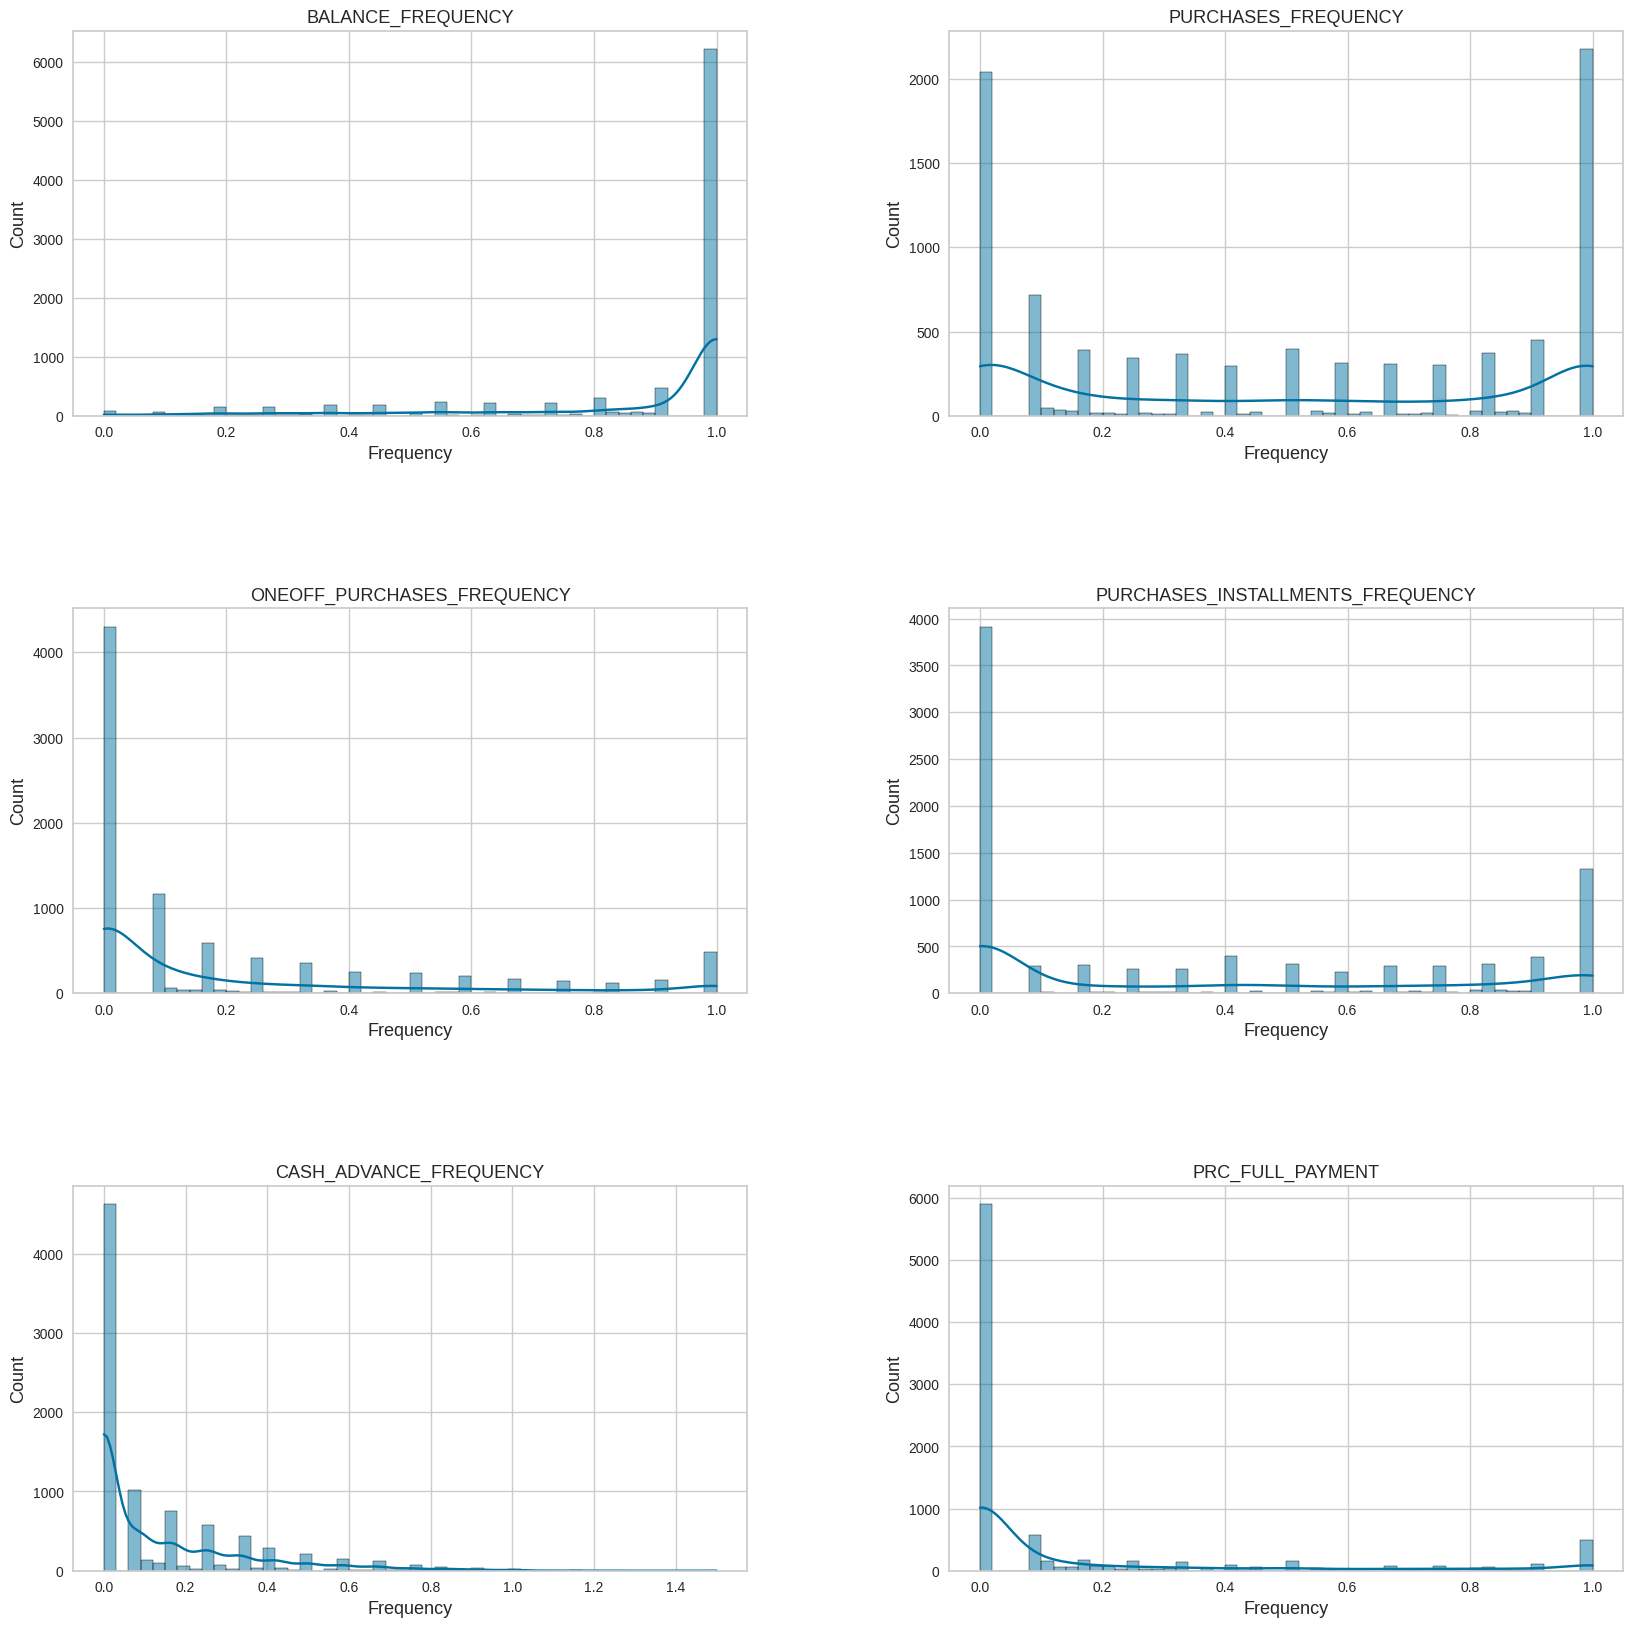

In [10]:
var_freq = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_freq):
    plt.subplot(3,2,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel('Count', fontsize=13)
    plt.subplots_adjust(hspace=0.5,wspace=0.3)
    sns.histplot(data=df, x=col,bins=50,kde=True)
    plt.savefig('variabel_frekuensi.png')

* Beberapa fitur sepertinya mengalami frekuensi yang cukup jarang seperi pada ONEOFF_PUCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, PRC_FULL_PAYMENTS.
* Untuk fitur PURCHASES_FREQUENCY  memiliki frekuensi yang cukup merata antara frekuensi yang cukup sering dan tidak

<small> cek variabel yang lain untuk melihat distribusi data </small>

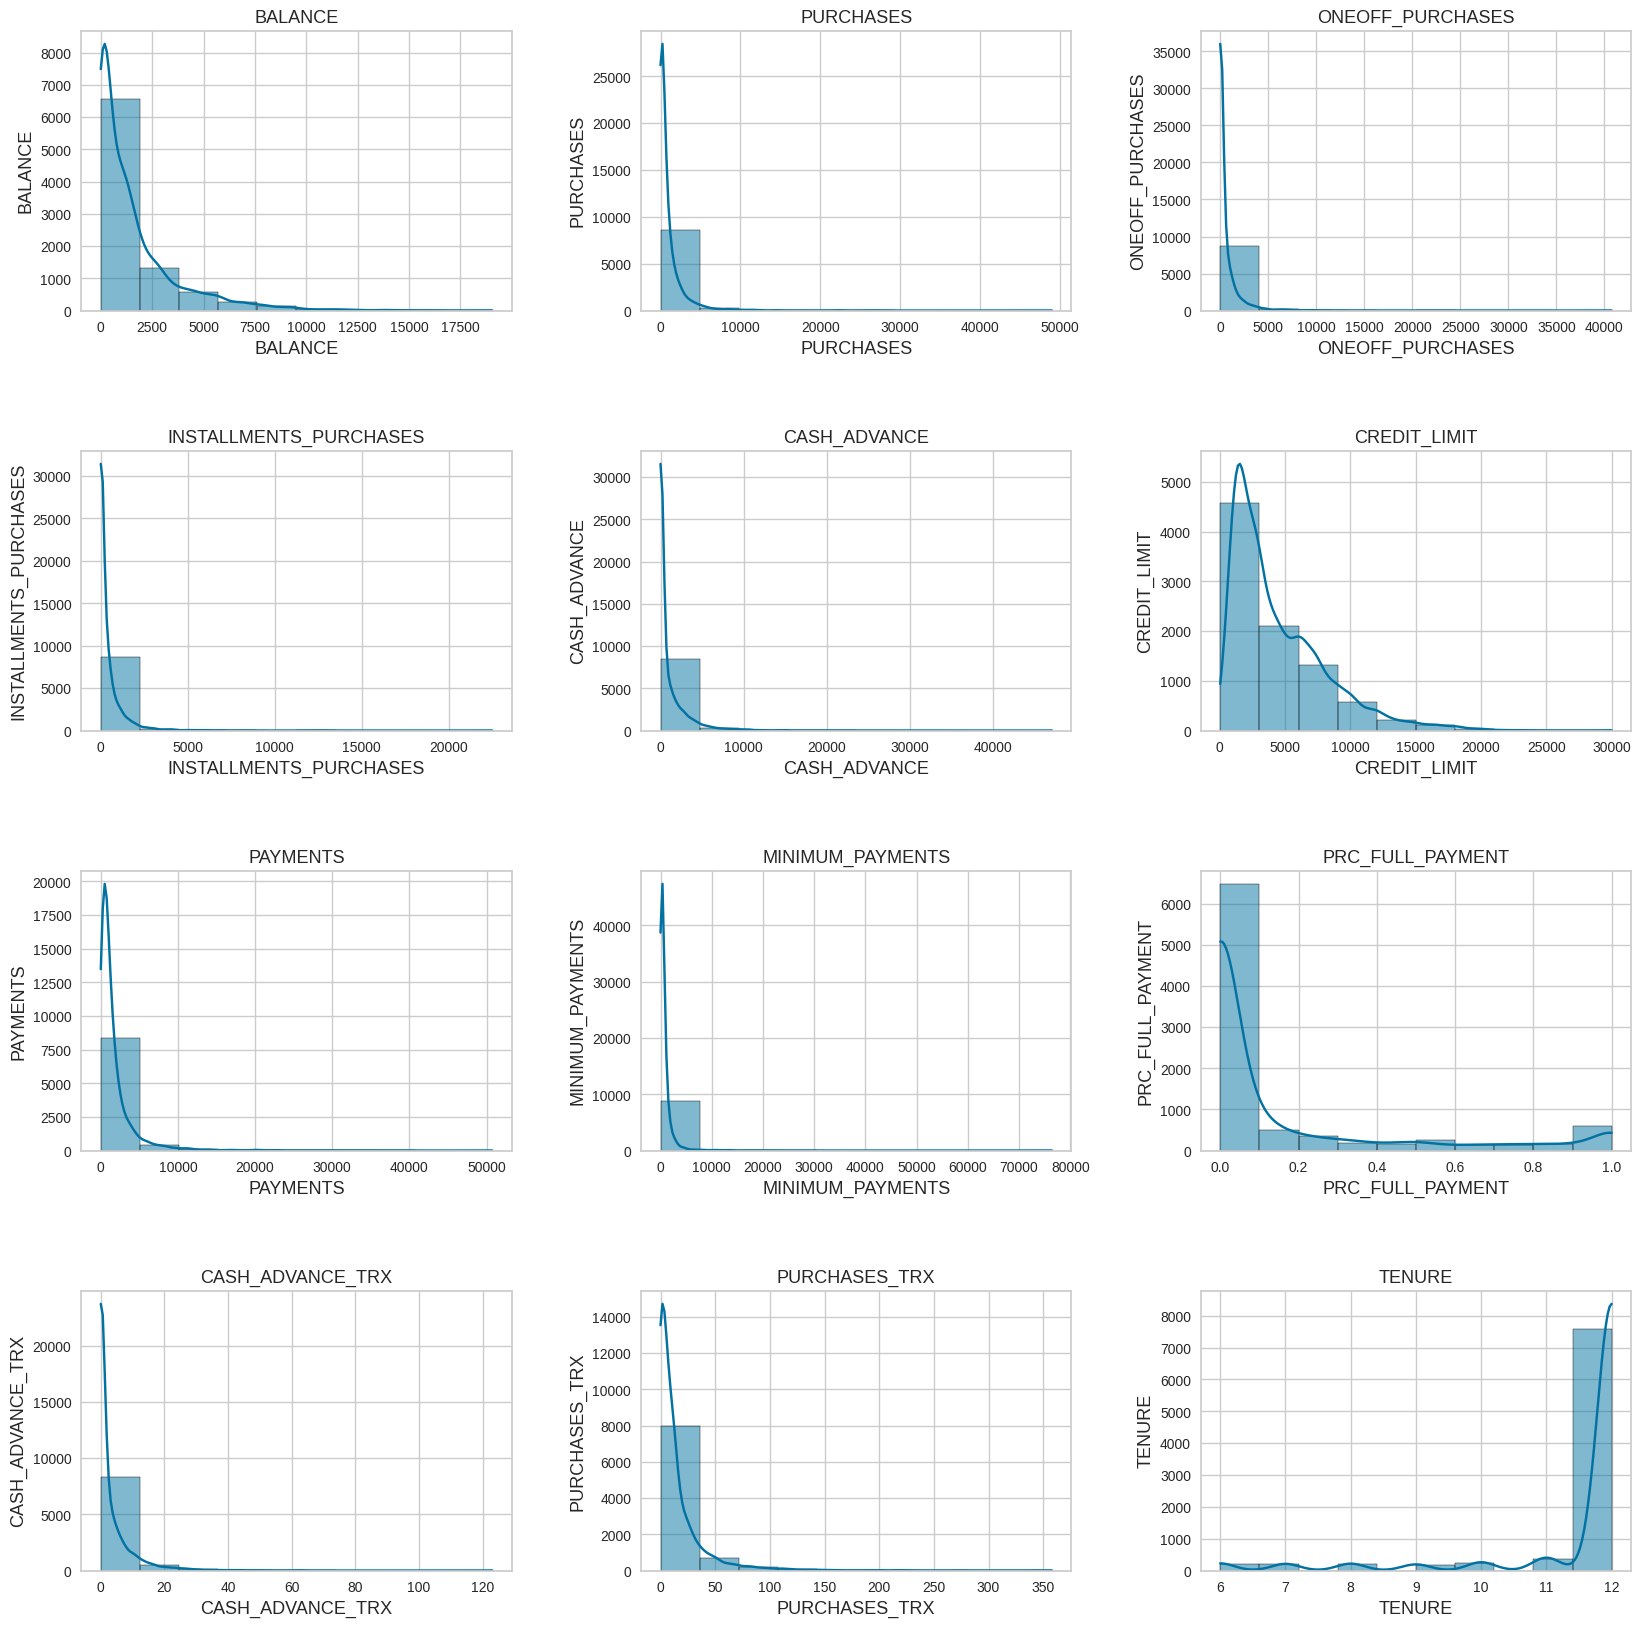

In [11]:
var_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col,fontsize=13)
    plt.xlabel(col,fontsize=13)
    plt.ylabel(col,fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=10, kde=True)
    plt.savefig('variabel_cek.png')

<small>semua fitur memiliki distribusi yang tidak normal , distribusi mengalami skewness</small>

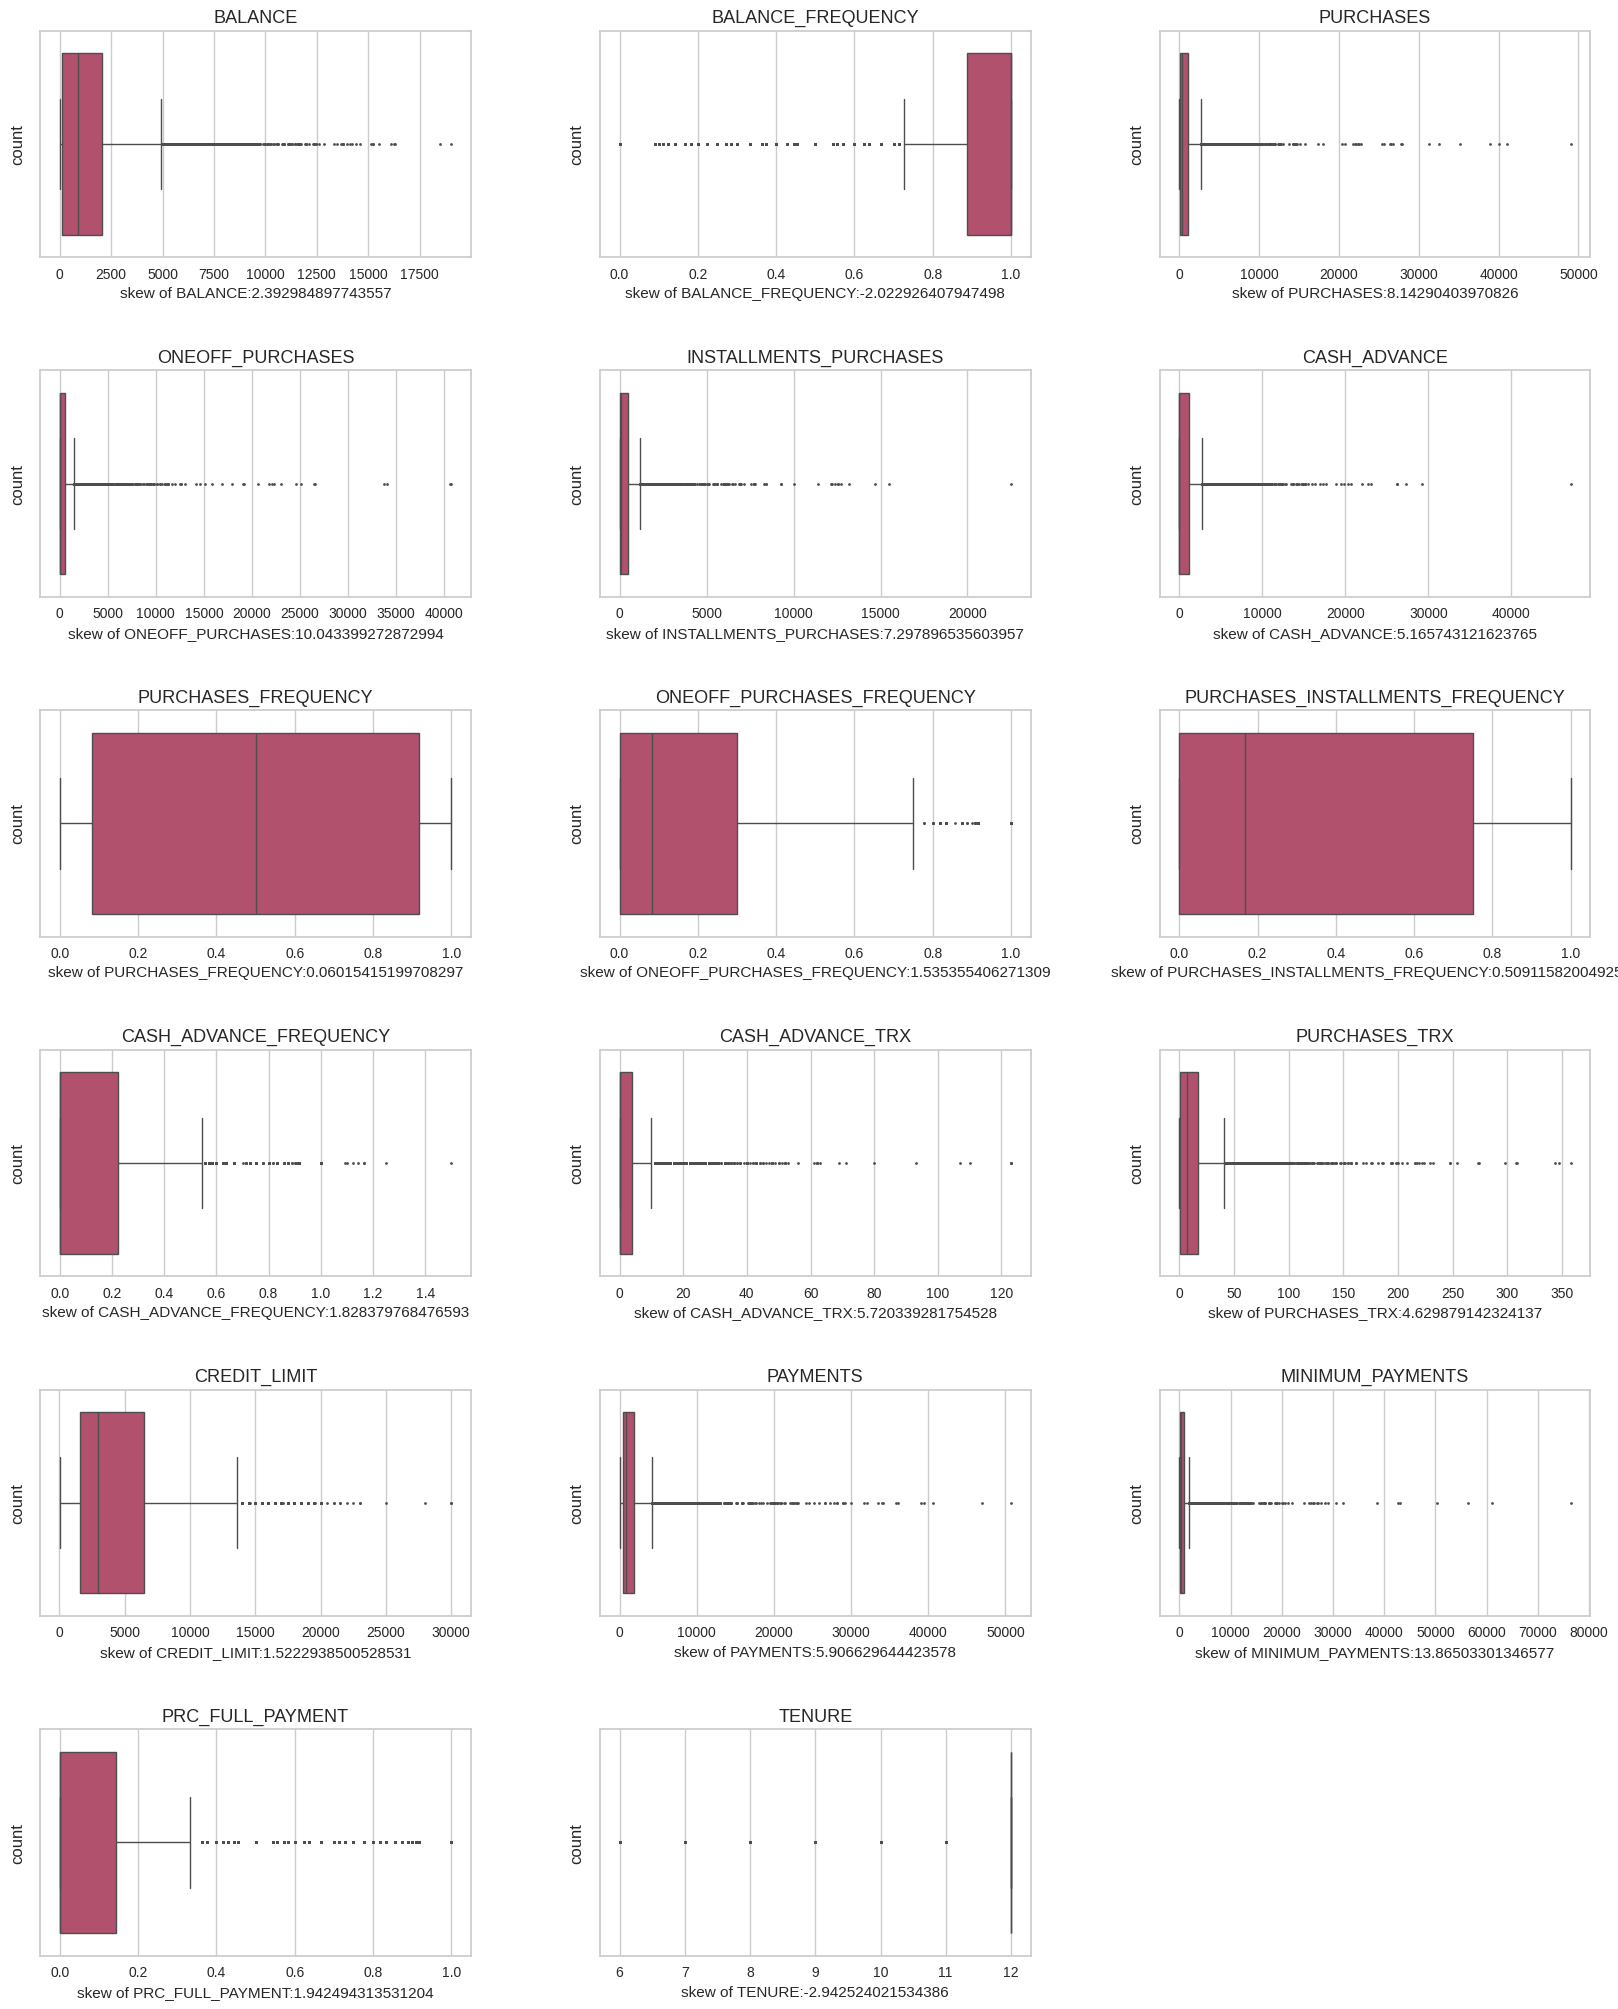

In [12]:
cols = df.columns.to_list()
plt.figure(figsize=(20,25))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count", fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare',fliersize=1)
    plt.savefig('outlier_cek.png')


<small>Terdapat banyak dari fitur-fitur ini memiliki outliers, tetapi outliers tersebut terlihat seperti natural outliers bukan terjadi karena kesalahan input atau pengukuran. Ada kemungkinan terdapat nasabah/pelanggan yang melakukan transaksi dengan nominal yang sangat besar</small>

<small>correlation matrix</small>

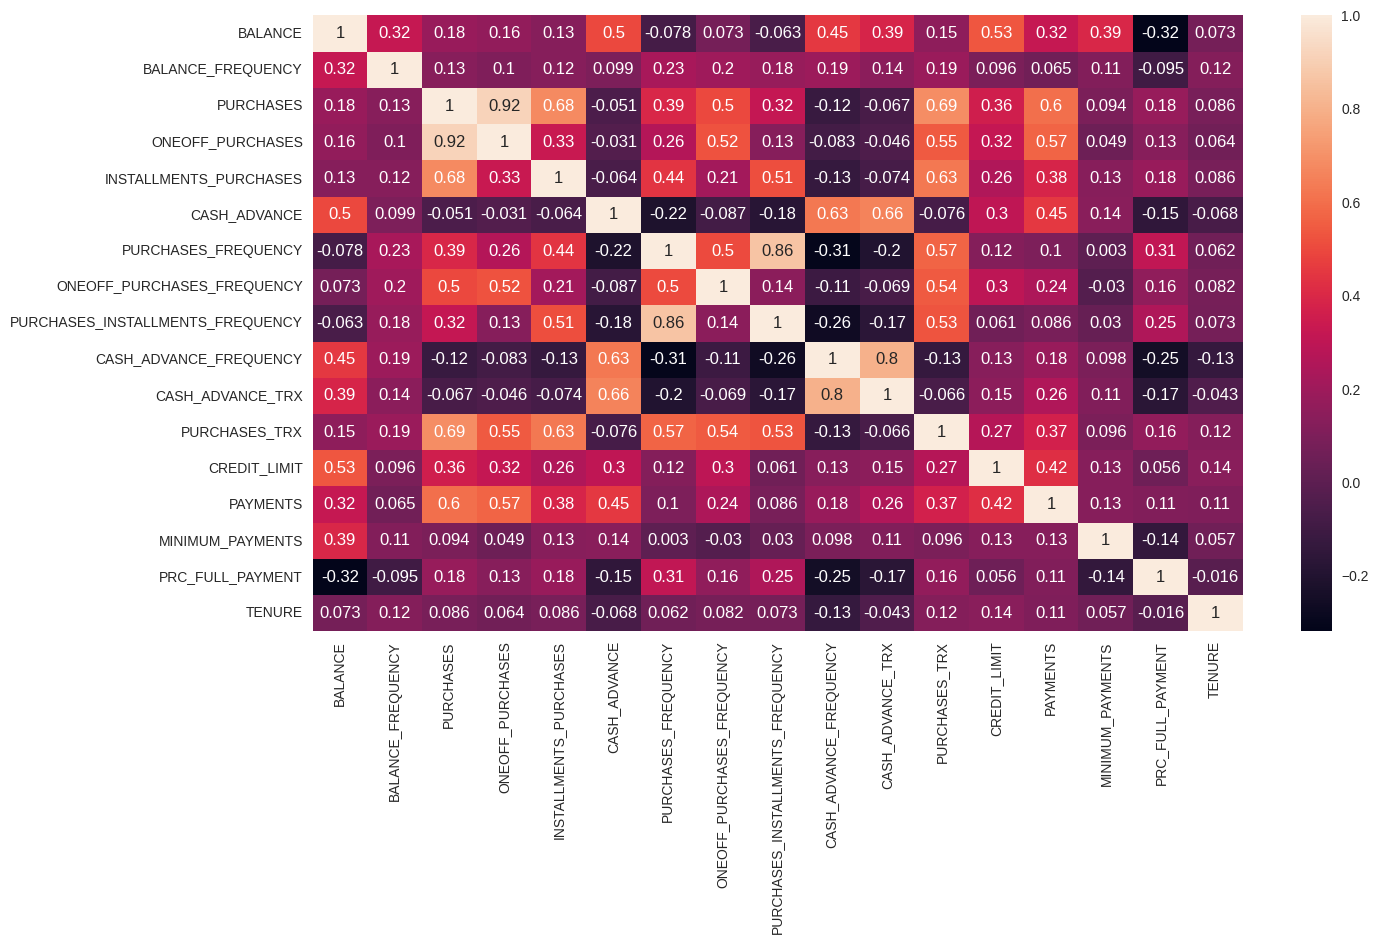

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.savefig('corr_matrix.png')


<small>variabel-variabel yang berkorelasi tinggi tidak berguna untuk algoritma segmentasi karena mereka merepresentasikan karakteristik yang sama dari sebuah segmen. variabel atau fitur yang memiliki korelasi tinggi yaitu PURCHASES dan ONEOFF_PURCHASES dengan skor 0.92, PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY dengan skor 0.86, CASH_ADVANCE_FREQUENCY dan CASH_ADVANCE_TRX dengan skor 0.8. Daripada membuang fitur-fitur tersebut dan kehilangan informasi, Untuk menangani issue ini akan digunakan metode PCA yang mana dapat membantu mempertahankan informasi dan diwaktu yang sama bisa didapatkan variabel independent</small>

Preprocessing Data

<small>Scaling data</small>

<small>
Pada projek ini digunakan 3 teknik data scaler yaitu MinMax Scaler, Robust Scaler dan Standard Scaler untuk dibandingkan hasilnya dan akan dipilih teknik yang menghasilkan score paling optimal
</small>


In [14]:
MMScaler = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
RBScaler = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)
SSScaler = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [15]:
MMScaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.082154,0.109306,0.0,0.006736,0.045864,0.107868,1.0
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8950.0,0.020457,0.043570,0.0,0.000808,0.007367,0.022637,1.0
ONEOFF_PURCHASES,8950.0,0.014534,0.040722,0.0,0.000000,0.000932,0.014166,1.0
INSTALLMENTS_PURCHASES,8950.0,0.018270,0.040193,0.0,0.000000,0.003956,0.020828,1.0
CASH_ADVANCE,8950.0,0.020766,0.044491,0.0,0.000000,0.000000,0.023629,1.0
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.090096,0.133414,0.0,0.000000,0.000000,0.148148,1.0


In [16]:
RBScaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.358848,1.080833,-0.453504,-0.386894,2.951740e-17,0.613106,9.434627
BALANCE_FREQUENCY,8950.0,-1.104565,2.132138,-9.000009,-1.000000,0.000000e+00,0.000000,0.000000
PURCHASES,8950.0,0.599652,1.995932,-0.337489,-0.300464,2.653585e-17,0.699536,45.472693
ONEOFF_PURCHASES,8950.0,0.960223,2.874738,-0.065812,-0.065812,0.000000e+00,0.934188,70.528052
INSTALLMENTS_PURCHASES,8950.0,0.687243,1.929718,-0.189912,-0.189912,0.000000e+00,0.810088,47.821611
CASH_ADVANCE,8950.0,0.878840,1.882855,0.000000,0.000000,0.000000e+00,1.000000,42.320270
PURCHASES_FREQUENCY,8950.0,-0.011579,0.481645,-0.600000,-0.500000,0.000000e+00,0.500000,0.600000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.397082,0.994454,-0.277777,-0.277777,0.000000e+00,0.722223,3.055557
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.263694,0.529930,-0.222223,-0.222223,0.000000e+00,0.777777,1.111111
CASH_ADVANCE_FREQUENCY,8950.0,0.608150,0.900547,0.000000,0.000000,0.000000e+00,1.000000,6.750007


In [17]:
SSScaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-2.540488e-17,1.000056,-0.751640,-0.690008,-0.332029,2.352559e-01,8.397489
BALANCE_FREQUENCY,8950.0,1.587805e-16,1.000056,-3.703271,0.049045,0.518084,5.180838e-01,0.518084
PURCHASES,8950.0,3.175610e-18,1.000056,-0.469552,-0.451001,-0.300454,5.004652e-02,22.483510
ONEOFF_PURCHASES,8950.0,-6.033659e-17,1.000056,-0.356934,-0.356934,-0.334040,-9.056763e-03,24.201066
INSTALLMENTS_PURCHASES,8950.0,3.175610e-17,1.000056,-0.454576,-0.454576,-0.356156,6.366321e-02,24.426889
CASH_ADVANCE,8950.0,-6.351220e-18,1.000056,-0.466786,-0.466786,-0.466786,6.435242e-02,22.011117
PURCHASES_FREQUENCY,8950.0,9.328354e-17,1.000056,-1.221758,-1.014125,0.024043,1.062211e+00,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,1.905366e-17,1.000056,-0.678661,-0.678661,-0.399319,3.269728e-01,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,5.716098e-17,1.000056,-0.916995,-0.916995,-0.497629,9.701506e-01,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,-1.595744e-16,1.000056,-0.675349,-0.675349,-0.675349,4.351492e-01,6.820521


Reduksi Dimensi menggunakan PCA

<small>
set parameter n_components = 0.9, yang berarti bahwa PCA secara otomatis akan menghasilkan cukup banyak principal component yang akan mempertahankan 90% varians dalam dataset.
</small>

In [18]:
pca = PCA(n_components=0.9, random_state=42)
pcaMM = pca.fit(MMScaler)
pcMM = ['PC'+ str(n)for n in range(1,len(pcaMM.components_)+1)]
dfpcaMM = pd.DataFrame(pcaMM.transform(MMScaler),columns=pcMM)

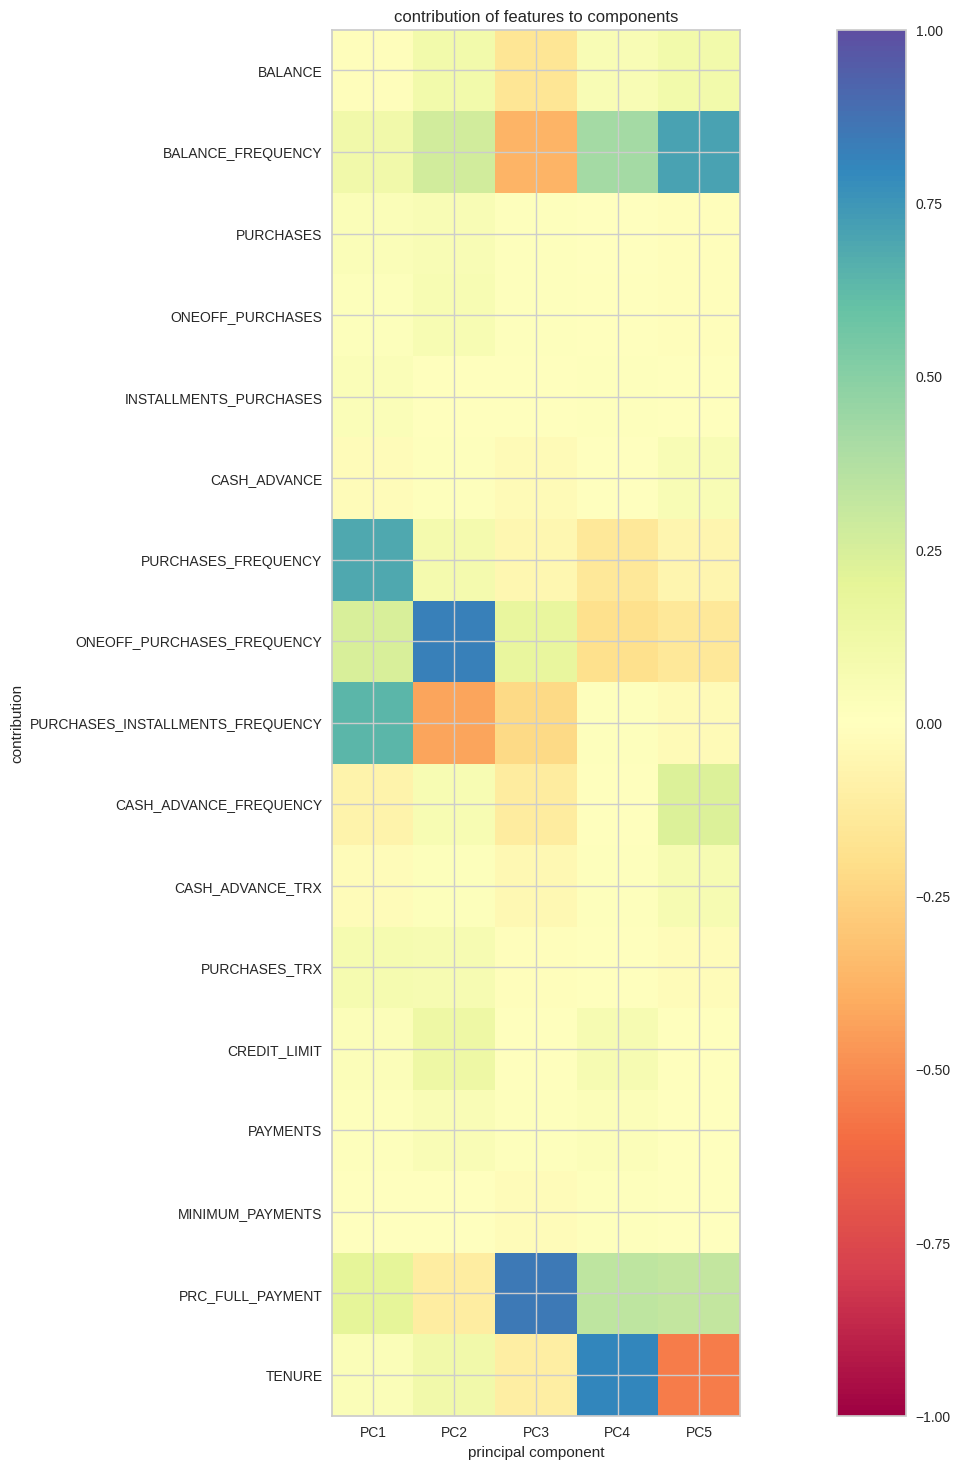

In [19]:
fig, ax = plt.subplots(figsize=(25,18))
plt.imshow(
    pcaMM.components_.T,
    cmap="Spectral",
    vmin=-1,
    vmax=1,
)
plt.yticks(range(len(MMScaler.columns)),MMScaler.columns)
plt.xticks(range(len(dfpcaMM.columns)),dfpcaMM.columns)
plt.xlabel("principal component")
plt.ylabel("contribution")
plt.title("contribution of features to components")
plt.colorbar()

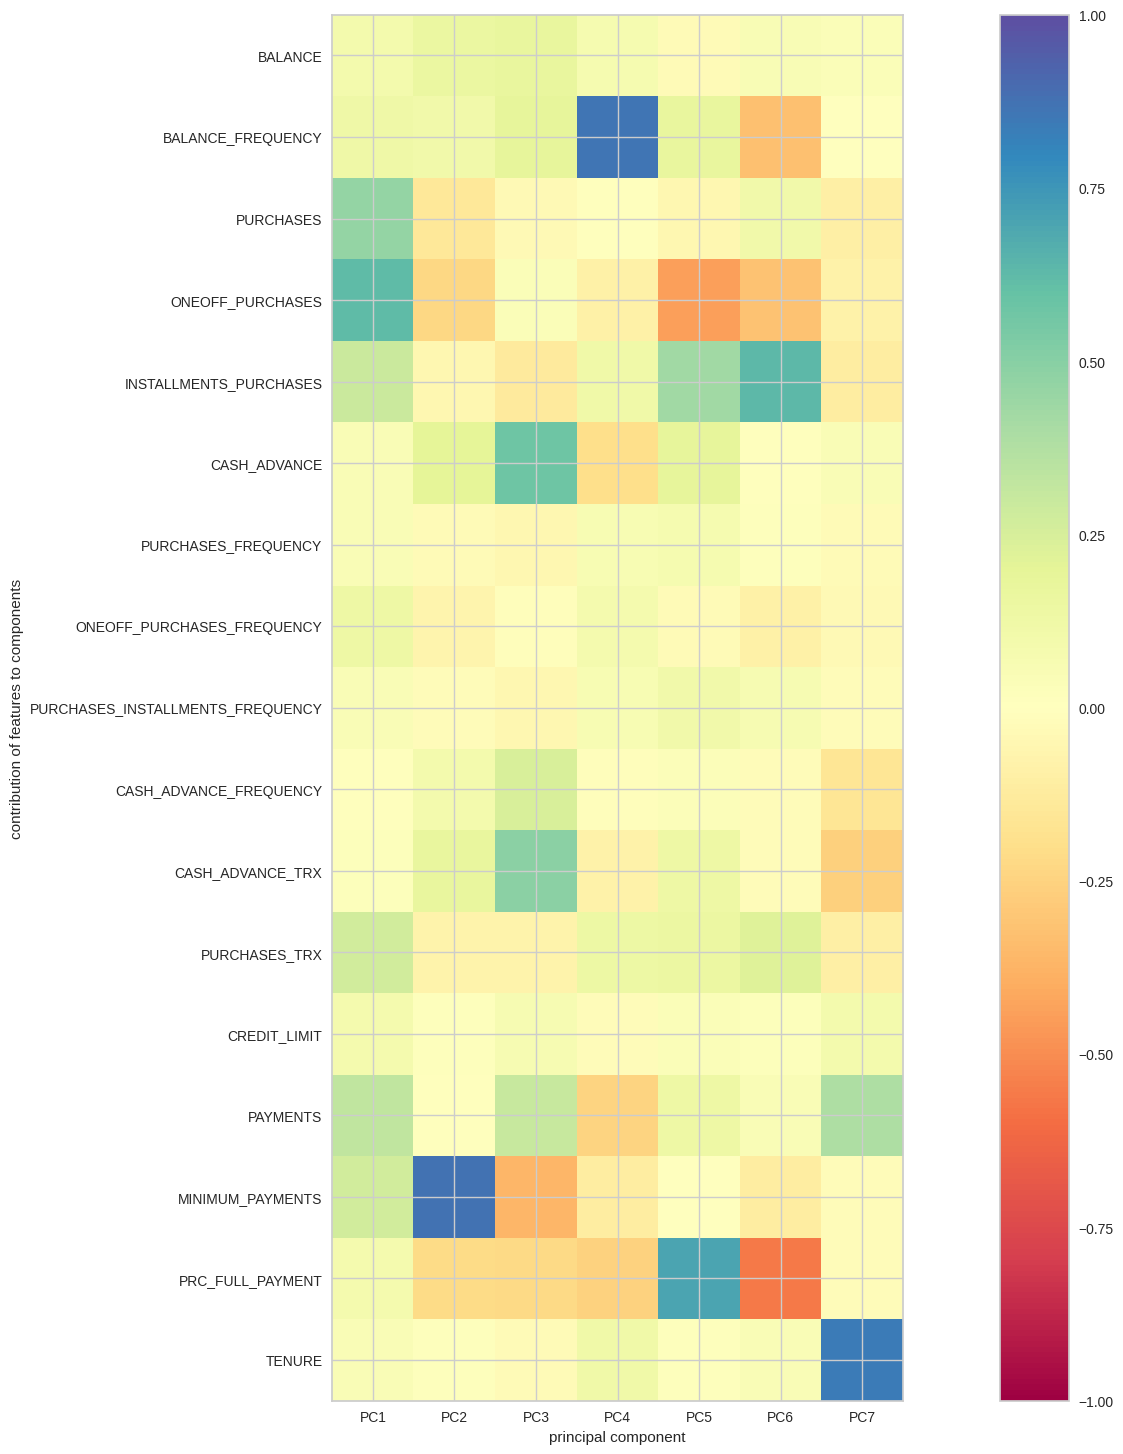

In [23]:
pcaRB  = pca.fit(RBScaler)
pcRB = ['PC'+str(n) for n in range (1, len(pcaRB.components_)+1)]
dfpcaRB = pd.DataFrame(pcaRB.transform(RBScaler),columns=pcRB)
fig, ax = plt.subplots(figsize=(25,18))
plt.imshow(pcaRB.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
           )
plt.yticks(range(len(RBScaler.columns)), RBScaler.columns)
plt.xticks(range(len(dfpcaRB.columns)),dfpcaRB.columns)
plt.xlabel("principal component")
plt.ylabel("contribution of features to components")
plt.colorbar()

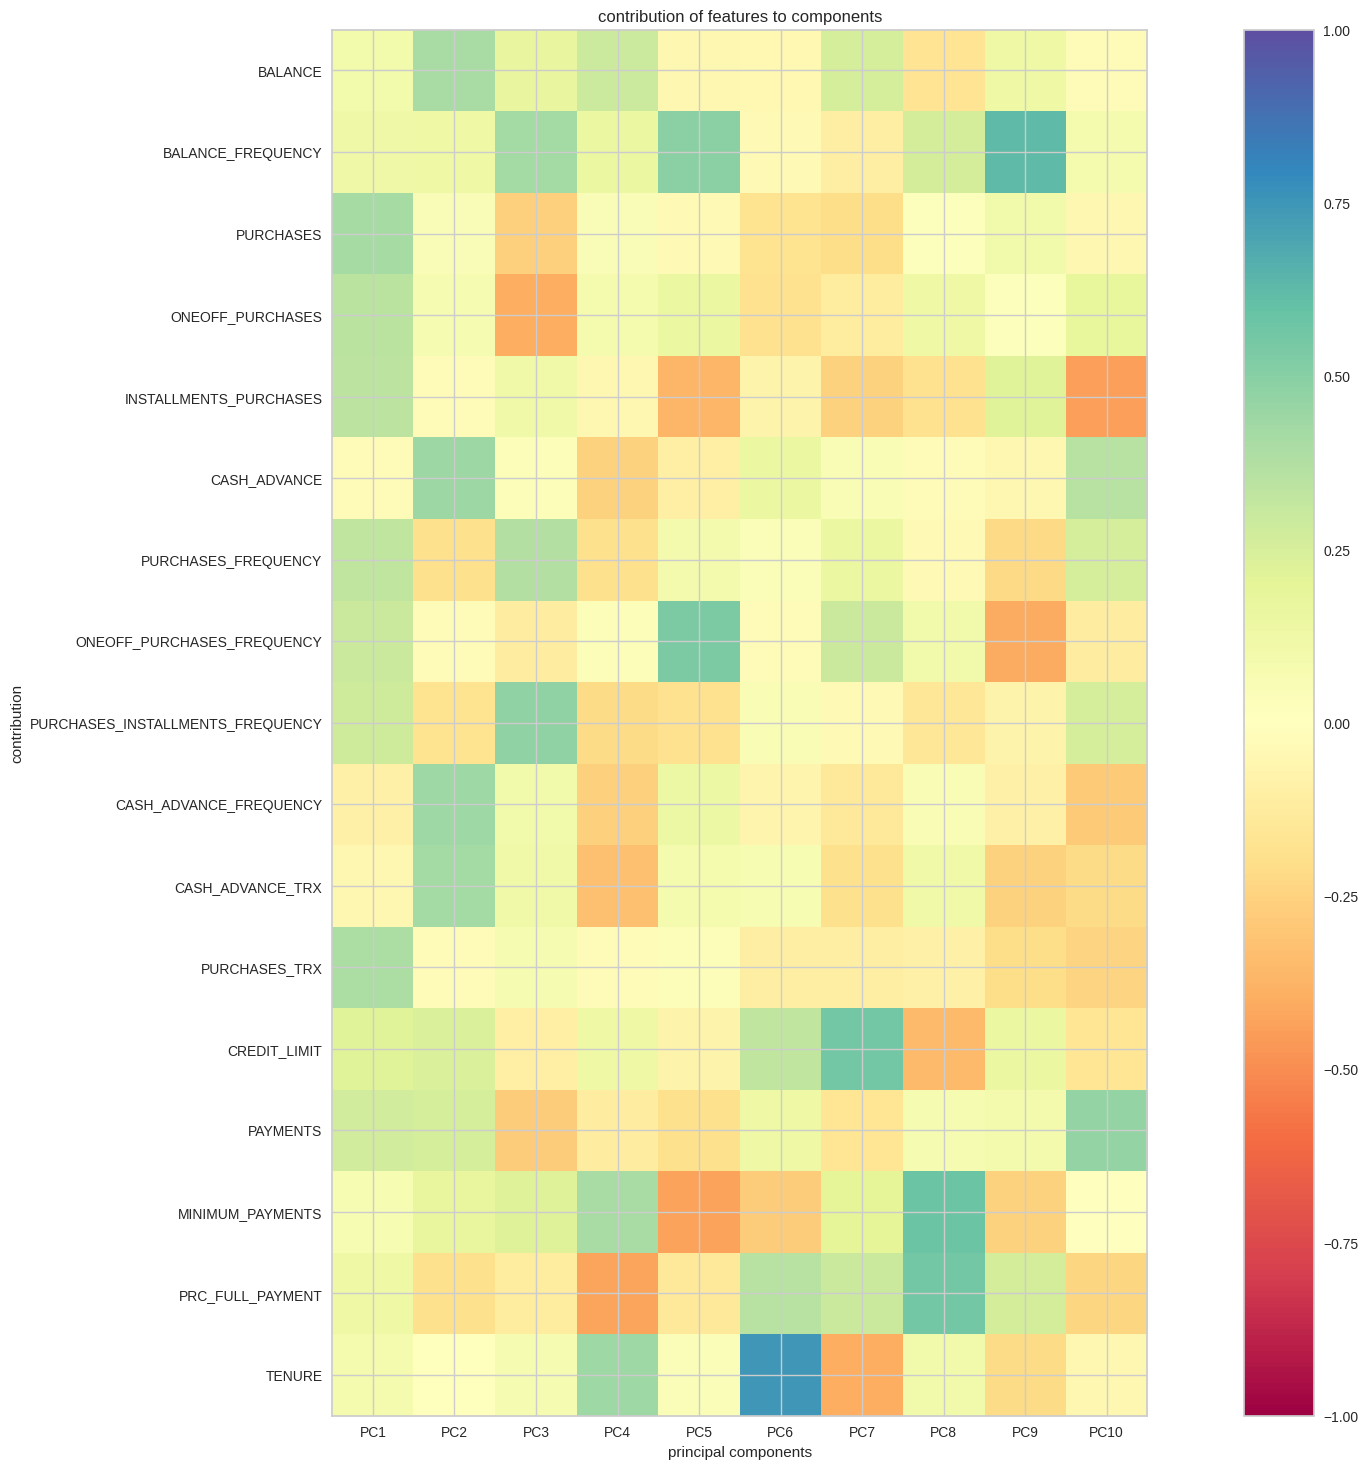

In [25]:
pcaSS = pca.fit(SSScaler)
pcSS = ['PC'+str(n) for n in range(1, len(pcaSS.components_)+1)]
dfpcaSS = pd.DataFrame(pcaSS.transform(SSScaler), columns=pcSS)
fig, ax = plt.subplots(figsize=(25,18))
plt.imshow(
    pcaSS.components_.T,
    cmap="Spectral",
    vmin=-1,
    vmax=1,
)

plt.yticks(range(len(SSScaler.columns)), SSScaler.columns)
plt.xticks(range(len(dfpcaSS.columns)), dfpcaSS.columns)
plt.xlabel("principal components")
plt.ylabel("contribution")
plt.title("contribution of features to components")
plt.colorbar()

clustering

<small>
menemukan parameter n_clusters menggunakan metode elbow
</small>

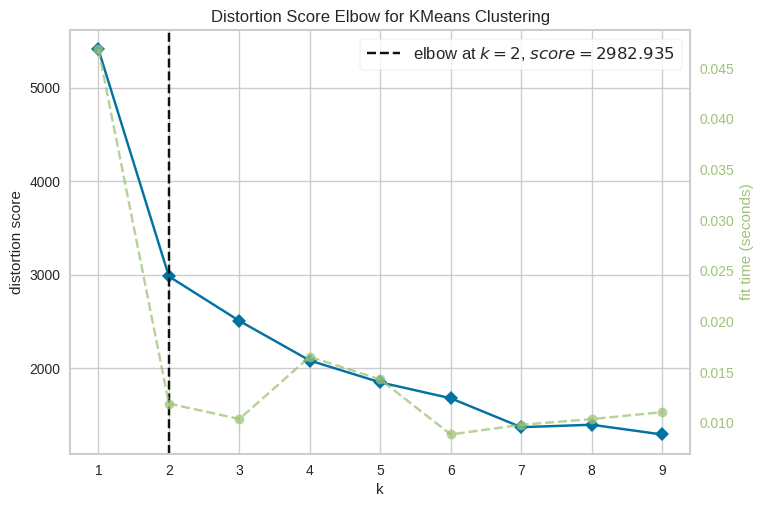

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer_MM = KElbowVisualizer(model, k=(1,10))
visualizer_MM.fit(dfpcaMM)
visualizer_MM.show()